<a href="https://colab.research.google.com/github/vikram2727/ML-a-to-z/blob/main/Copy_of_Project_1_KVLOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [117]:
# import all the libraries required for this chapter
# Machine Learning Libraries: scikit-learn, keras and tensorflow

# setting seed for model reproducibility
seed_value = 42
import os
os.environ['PYTHONHASHSEED'] = str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)
import pandas as pd

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import normalize, Normalizer, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn import metrics
from sklearn.compose import ColumnTransformer
import sklearn.cluster as cluster
import lightgbm as lgb
import xgboost as xgb

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from keras.utils import np_utils

# plotting libraries
import matplotlib as mpl
import matplotlib.style
import seaborn as sns  # visualization
import matplotlib.pyplot as plt
# formatting for decimal places
pd.set_option("display.float_format", "{:.2f}".format)
plt.style.use("seaborn-white")
sns.set_style("white")
import warnings
warnings.filterwarnings('ignore')

## Step 0. Import libraries and git clone

In [118]:
#from google.colab import drive
#drive.mount('/content/drive')

In [119]:
!git clone  https://github.com/vikram2727/o-g_data_analsis

fatal: destination path 'o-g_data_analsis' already exists and is not an empty directory.


In [120]:
!pip install lasio
import lasio

## Step 1. Load and Display the Well-log Datasets

In [240]:
import glob
import os

# get all paths and alphabetically ordered
paths = sorted(glob.glob(os.path.join("/content/o-g_data_analsis/well_logs", "*.las")))

well_df = [0] * 3

for i in range(len(paths)):
  # read with lasio
  well = lasio.read(paths[i])

  # convert to dataframe
  df = well.df()

  # in this dataframe, depth is positioned as index, not as column
  # so better to change depth index to column
  well_df[i] = df.reset_index()

well_1, well_2, well_3 = well_df


In [242]:
well_1.head()

DEPTH   BS  BVW  CARB_FLAG  COAL_FLAG  ...  SAND_FLAG   SW  SWIRR   TEMP  VSH
0 3666.59 8.50 0.11       0.00       0.00  ...       0.00 0.56   1.80 112.72 0.60
1 3666.74 8.50 0.11       0.00       0.00  ...       0.00 0.51   7.95 112.73 0.60
2 3666.90 8.50 0.11       0.00       0.00  ...       0.00 0.47   6.59 112.73 0.60
3 3667.05 8.50 0.11       0.00       0.00  ...       0.00 0.51   8.63 112.74 0.60
4 3667.20 8.50 0.12       0.00       0.00  ...       0.00 0.54   6.85 112.74 0.60

[5 rows x 24 columns]

In [123]:
well2.head()

DEPTH  BVW  CARB_FLAG  COAL_FLAG  KLOGH  ...   RW  SAND_FLAG   SW   TEMP  VSH
0 3768.09 0.03       0.00       0.00   0.00  ... 0.02       0.00 1.00 113.79 0.66
1 3768.24 0.03       0.00       0.00   0.00  ... 0.02       0.00 1.00 113.80 0.69
2 3768.39 0.01       0.00       0.00   0.00  ... 0.02       0.00 1.00 113.80 0.78
3 3768.55 0.02       0.00       0.00   0.00  ... 0.02       0.00 1.00 113.80 0.92
4 3768.70 0.04       0.00       0.00   0.00  ... 0.02       0.00 1.00 113.81 0.95

[5 rows x 14 columns]

In [124]:
well3.head()

DEPTH  BWV    DT  KLOGH  KLOGV  PHIF  SAND_FLAG  SW  VSH
0 3549.70 0.08   nan    nan    nan   nan        nan nan  nan
1 3549.85 0.08 54.59    nan    nan   nan        nan nan  nan
2 3550.01 0.08 54.59    nan    nan   nan        nan nan  nan
3 3550.16 0.08 54.59    nan    nan   nan        nan nan  nan
4 3550.31 0.08 54.59    nan    nan   nan        nan nan  nan

In [125]:
plt.style.use('fivethirtyeight')

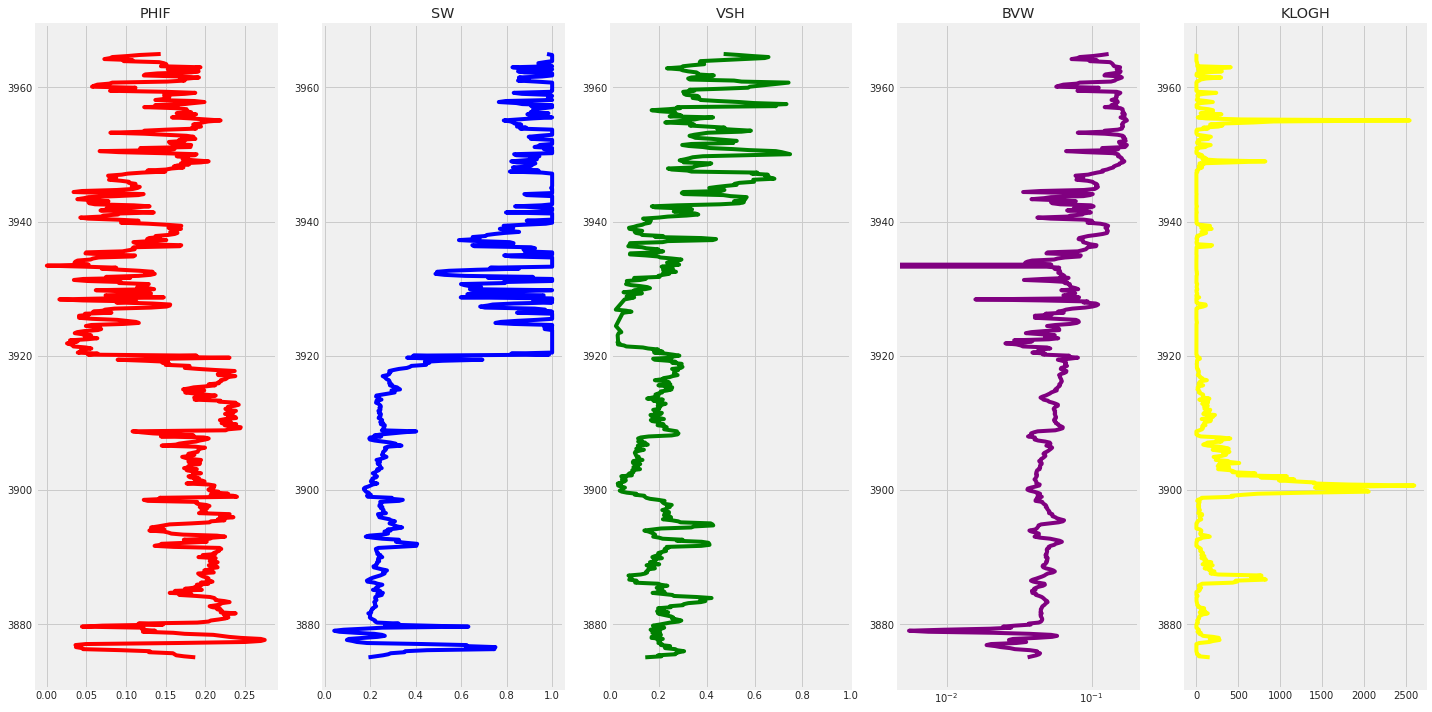

In [243]:
# Display train well data
well = well1 # train wells: well1, well3, well4

# define what logs are we going to us
logs = ['PHIF','SW','VSH','BVW','KLOGH']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

# looping each log to display in the subplots

colors = ['red', 'blue', 'green', 'purple','yellow']

for i in range(len(logs)):
  if i == 3:
    # for resistivity, semilog plot
    ax[i].semilogx(well[logs[i]], well['DEPTH'], color=colors[i])
  else:
    # for non-resistivity, normal plot
    ax[i].plot(well[logs[i]], well['DEPTH'], color=colors[i])
  
  ax[i].set_title(logs[i])
  ax[i].grid(True)

ax[2].set_xlim(0, 1)
#ax[4].set_xlim(0, 1000)
#ax[].set_xlim(0, 1000)
plt.tight_layout(1.1)
plt.show()

In [127]:
well3.info(verbose = False, buf=None, max_cols=None, memory_usage=None, null_counts=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7013 entries, 0 to 7012
Columns: 9 entries, DEPTH to VSH
dtypes: float64(9)
memory usage: 493.2 KB


In [247]:
well_3.rename(columns = {'BWV':'BVW'}, inplace = True) 

In [129]:
well3.head()

DEPTH  BVW    DT  KLOGH  KLOGV  PHIF  SAND_FLAG  SW  VSH
0 3549.70 0.08   nan    nan    nan   nan        nan nan  nan
1 3549.85 0.08 54.59    nan    nan   nan        nan nan  nan
2 3550.01 0.08 54.59    nan    nan   nan        nan nan  nan
3 3550.16 0.08 54.59    nan    nan   nan        nan nan  nan
4 3550.31 0.08 54.59    nan    nan   nan        nan nan  nan

In [130]:
well2

DEPTH  BVW  CARB_FLAG  COAL_FLAG  KLOGH  ...   RW  SAND_FLAG   SW   TEMP  VSH
0    3768.09 0.03       0.00       0.00   0.00  ... 0.02       0.00 1.00 113.79 0.66
1    3768.24 0.03       0.00       0.00   0.00  ... 0.02       0.00 1.00 113.80 0.69
2    3768.39 0.01       0.00       0.00   0.00  ... 0.02       0.00 1.00 113.80 0.78
3    3768.55 0.02       0.00       0.00   0.00  ... 0.02       0.00 1.00 113.80 0.92
4    3768.70 0.04       0.00       0.00   0.00  ... 0.02       0.00 1.00 113.81 0.95
...      ...  ...        ...        ...    ...  ...  ...        ...  ...    ...  ...
3157 4249.22  nan        nan       0.00    nan  ...  nan        nan  nan    nan  nan
3158 4249.37  nan       0.00       0.00    nan  ...  nan        nan  nan    nan  nan
3159 4249.52  nan       0.00       0.00    nan  ...  nan        nan  nan    nan  nan
3160 4249.67  nan       0.00       0.00    nan  ...  nan        nan  nan    nan  nan
3161 4249.83  nan       0.00       0.00    nan  ...  nan        nan  nan    nan  nan

[3162 rows x 14 columns]

In [131]:
well1

DEPTH   BS  BVW  CARB_FLAG  COAL_FLAG  ...  SAND_FLAG   SW  SWIRR   TEMP  VSH
0    3666.59 8.50 0.11       0.00       0.00  ...       0.00 0.56   1.80 112.72 0.60
1    3666.74 8.50 0.11       0.00       0.00  ...       0.00 0.51   7.95 112.73 0.60
2    3666.90 8.50 0.11       0.00       0.00  ...       0.00 0.47   6.59 112.73 0.60
3    3667.05 8.50 0.11       0.00       0.00  ...       0.00 0.51   8.63 112.74 0.60
4    3667.20 8.50 0.12       0.00       0.00  ...       0.00 0.54   6.85 112.74 0.60
...      ...  ...  ...        ...        ...  ...        ...  ...    ...    ...  ...
3003 4124.25 8.50  nan       0.00       0.00  ...        nan  nan    nan    nan 0.42
3004 4124.40 8.50  nan       0.00       0.00  ...        nan  nan    nan    nan 0.42
3005 4124.55 8.50  nan       0.00       0.00  ...        nan  nan    nan    nan 0.42
3006 4124.71 8.50  nan       0.00       0.00  ...        nan  nan    nan    nan 0.42
3007 4124.86 8.50  nan       0.00       0.00  ...        nan  nan    nan    nan 0.42

[3008 rows x 24 columns]

In [132]:
well3

DEPTH  BVW    DT  KLOGH  KLOGV  PHIF  SAND_FLAG   SW  VSH
0    3549.70 0.08   nan    nan    nan   nan        nan  nan  nan
1    3549.85 0.08 54.59    nan    nan   nan        nan  nan  nan
2    3550.01 0.08 54.59    nan    nan   nan        nan  nan  nan
3    3550.16 0.08 54.59    nan    nan   nan        nan  nan  nan
4    3550.31 0.08 54.59    nan    nan   nan        nan  nan  nan
...      ...  ...   ...    ...    ...   ...        ...  ...  ...
7008 4617.72 0.00 40.00   0.00    nan  0.00       0.00 1.00  nan
7009 4617.87 0.00 40.00   0.00    nan  0.00       0.00 1.00  nan
7010 4618.02 0.00 40.00   0.00    nan  0.00       0.00 1.00  nan
7011 4618.18 0.00 40.00   0.00    nan  0.00       0.00 1.00  nan
7012 4618.33  nan 40.00    nan    nan   nan        nan  nan  nan

[7013 rows x 9 columns]

## Step 2. Data Preparation

In [248]:
# lower limit
low = [3875,4050,4400]

# upper limit
up = [3965,4175,4550]

# train columns to use
train_cols = ['DEPTH','PHIF','SW','VSH','BVW', 'KLOGH', 'KLOGV']

# test columns to use
test_cols = ['DEPTH','PHIF','SW','VSH','BVW', 'KLOGH']

well_df_restrict = [0] * 3

for i in range(len(well_df)):
  # restrict depth within the given lower and upper limit
  df = well_df[i].loc[(well_df[i]['DEPTH'] >= low[i]) & (well_df[i]['DEPTH'] <= up[i])]

  if i == 1 or i == 2:
    # the train data, drop unwanted columns
    well_df_restrict[i] = df[train_cols]
  
  else:
    # the test data, drop unwanted columns
    well_df_restrict[i] = df[test_cols]

well1, well2, well3 = well_df_restrict

# as we can see, both ends already not have NaNs
well2

DEPTH  PHIF   SW  VSH  BVW  KLOGH  KLOGV
1850 4050.03  0.21 0.96 0.20 0.20  76.51  56.66
1851 4050.18  0.22 0.96 0.19 0.21 121.38  92.49
1852 4050.33  0.21 0.97 0.20 0.21  88.50  66.14
1853 4050.49  0.21 0.91 0.21 0.19  67.61  49.69
1854 4050.64  0.22 0.87 0.29 0.19  15.81  10.62
...      ...   ...  ...  ...  ...    ...    ...
2666 4174.39  0.21 0.94 0.32 0.20   6.68   4.26
2667 4174.54  0.21 0.99 0.32 0.20   5.45   3.43
2668 4174.69  0.21 0.98 0.34 0.21   4.87   3.04
2669 4174.85  0.23 0.95 0.39 0.22   2.13   1.27
2670 4175.00  0.23 0.96 0.38 0.22   2.41   1.44

[821 rows x 7 columns]

In [134]:
well2.describe()

DEPTH   PHIF     SW    VSH    BVW   KLOGH   KLOGV
count  821.00 821.00 821.00 821.00 821.00  821.00  821.00
mean  4112.51   0.20   0.95   0.19   0.19  427.06  374.52
std     36.14   0.04   0.13   0.13   0.05  552.70  494.06
min   4050.03   0.00   0.12   0.02   0.00    0.00    0.00
25%   4081.27   0.19   0.95   0.08   0.18    3.96    4.70
50%   4112.51   0.21   1.00   0.15   0.20  184.04  155.69
75%   4143.76   0.22   1.00   0.31   0.22  705.99  601.97
max   4175.00   0.27   1.00   0.63   0.25 3296.89 3079.10

In [135]:

well3.describe()

DEPTH   PHIF     SW    VSH    BVW  KLOGH  KLOGV
count  984.00 984.00 984.00 984.00 984.00 984.00 984.00
mean  4475.00   0.15   0.94   0.30   0.14   3.70   2.45
std     43.31   0.05   0.07   0.09   0.04   6.95   4.83
min   4400.09   0.04   0.63   0.08   0.04   0.00   0.00
25%   4437.55   0.11   0.90   0.23   0.11   0.02   0.01
50%   4475.00   0.14   1.00   0.29   0.13   0.06   0.03
75%   4512.45   0.20   1.00   0.35   0.18   4.42   2.75
max   4549.90   0.26   1.00   0.64   0.24  60.48  44.15

In [136]:
well1.describe()

DEPTH   PHIF     SW    VSH    BVW   KLOGH
count  591.00 591.00 591.00 591.00 591.00  591.00
mean  3920.03   0.15   0.59   0.24   0.07  124.07
std     26.02   0.06   0.34   0.15   0.04  301.97
min   3875.07   0.00   0.04   0.02   0.00    0.00
25%   3897.55   0.11   0.25   0.14   0.05    0.38
50%   3920.03   0.17   0.60   0.22   0.06   21.32
75%   3942.51   0.20   0.97   0.31   0.09  104.67
max   3964.99   0.28   1.00   0.75   0.17 2604.36

In [137]:
print(well1.isnull().sum())
well3.info()


DEPTH    0
PHIF     0
SW       0
VSH      0
BVW      0
KLOGH    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 5580 to 6563
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   984 non-null    float64
 1   PHIF    984 non-null    float64
 2   SW      984 non-null    float64
 3   VSH     984 non-null    float64
 4   BVW     984 non-null    float64
 5   KLOGH   984 non-null    float64
 6   KLOGV   984 non-null    float64
dtypes: float64(7)
memory usage: 61.5 KB


In [138]:
print(well2.isnull().sum())
well2.info()

DEPTH    0
PHIF     0
SW       0
VSH      0
BVW      0
KLOGH    0
KLOGV    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 1850 to 2670
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   821 non-null    float64
 1   PHIF    821 non-null    float64
 2   SW      821 non-null    float64
 3   VSH     821 non-null    float64
 4   BVW     821 non-null    float64
 5   KLOGH   821 non-null    float64
 6   KLOGV   821 non-null    float64
dtypes: float64(7)
memory usage: 51.3 KB


In [139]:
print(well3.isnull().sum())
well3.info()

DEPTH    0
PHIF     0
SW       0
VSH      0
BVW      0
KLOGH    0
KLOGV    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 5580 to 6563
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   984 non-null    float64
 1   PHIF    984 non-null    float64
 2   SW      984 non-null    float64
 3   VSH     984 non-null    float64
 4   BVW     984 non-null    float64
 5   KLOGH   984 non-null    float64
 6   KLOGV   984 non-null    float64
dtypes: float64(7)
memory usage: 61.5 KB


In [140]:
avg = well1['PHIF'].mean()
well1['PHIF'].fillna(value = avg ,  inplace=True)
avg = well1['SW'].mean()
well1['SW'].fillna(value = avg ,  inplace=True)
avg = well1['KLOGH'].mean()
well1['KLOGH'].fillna(value = avg ,  inplace=True)
avg = well1['BVW'].mean()
well1['BVW'].fillna(value = avg ,  inplace=True)

In [141]:
avg = well2['KLOGV'].mean()
well2['KLOGV'].fillna(value = avg ,  inplace=True)

In [142]:
avg = well3['VSH'].mean()
well3['VSH'].fillna(value = avg ,  inplace=True)
avg = well3['KLOGV'].mean()
well3['KLOGV'].fillna(value = avg ,  inplace=True)
avg = well3['KLOGH'].mean()
well3['KLOGH'].fillna(value = avg ,  inplace=True)
avg = well3['PHIF'].mean()
well3['PHIF'].fillna(value = avg ,  inplace=True)
avg = well3['SW'].mean()
well3['SW'].fillna(value = avg ,  inplace=True)
avg = well3['BVW'].mean()
well3['BVW'].fillna(value = avg ,  inplace=True)


In [143]:
well1.isnull().sum()

DEPTH    0
PHIF     0
SW       0
VSH      0
BVW      0
KLOGH    0
dtype: int64

In [144]:
well2.isnull().sum()

DEPTH    0
PHIF     0
SW       0
VSH      0
BVW      0
KLOGH    0
KLOGV    0
dtype: int64

In [145]:
well3.isnull().sum()

DEPTH    0
PHIF     0
SW       0
VSH      0
BVW      0
KLOGH    0
KLOGV    0
dtype: int64

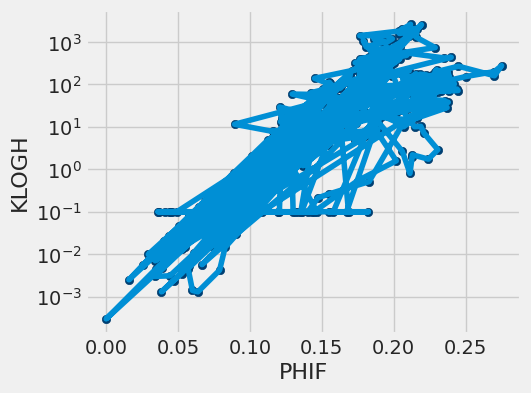

In [146]:
# Cross plot comparing GR to Deep Resistivity
from statistics import mean
xs = well1.PHIF.values
ys = well1.KLOGH.values
plt.figure(figsize=(5,4), dpi=100) # figure size and dpi you can set here
plt.scatter(xs, ys, color='blue', marker='.', alpha=0.3)
plt.yscale('log') #log scale for Y axis

plt.grid(True)
plt.xlabel('PHIF', size=16)
plt.ylabel('KLOGH', size=16)
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, ys)
plt.show()

In [147]:
# merge dataframes
well_train = pd.concat([well2, well3])
well_pred = pd.concat([well1])

# assign names
names = ['15_9-19 A', '15_9-19 BT2', '15_9-19 SR']

names_train = []
names_pred = []
for i in range(len(well_df_restrict)):
  if i == 2 or i == 1 :
    # train data, assign names 
    _ = np.full(len(well_df_restrict[i]), names[i])
    names_train.append(_)
  else:
    # test data, assign names
    _ = np.full(len(well_df_restrict[i]), names[i])
    names_pred.append(_)

# concatenate inside list
import itertools

names_train = list(itertools.chain.from_iterable(names_train))
names_pred = list(itertools.chain.from_iterable(names_pred))

# include well names to the train and pred dataframe
well_train['WELL'] = names_train
well_pred['WELL'] = names_pred

# move the depth column to the right
depth_train, depth_pred = well_train.pop('DEPTH'), well_pred.pop('DEPTH')
well_train['DEPTH'], well_pred['DEPTH'] = depth_train, depth_pred

well_pred

PHIF   SW  VSH  BVW  KLOGH       WELL   DEPTH
1368  0.19 0.19 0.14 0.04 159.00  15_9-19 A 3875.07
1369  0.17 0.23 0.21 0.04  30.07  15_9-19 A 3875.23
1370  0.16 0.26 0.20 0.04  33.46  15_9-19 A 3875.38
1371  0.16 0.28 0.27 0.04   7.28  15_9-19 A 3875.53
1372  0.16 0.29 0.27 0.04   6.74  15_9-19 A 3875.68
...    ...  ...  ...  ...    ...        ...     ...
1954  0.08 1.00 0.64 0.08   0.02  15_9-19 A 3964.38
1955  0.08 1.00 0.66 0.08   0.02  15_9-19 A 3964.53
1956  0.10 1.00 0.59 0.10   0.12  15_9-19 A 3964.69
1957  0.12 1.00 0.53 0.12   0.46  15_9-19 A 3964.84
1958  0.14 0.98 0.47 0.13   4.52  15_9-19 A 3964.99

[591 rows x 7 columns]

In [148]:
well_train

PHIF   SW  VSH  BVW  KLOGH  KLOGV         WELL   DEPTH
1850  0.21 0.96 0.20 0.20  76.51  56.66  15_9-19 BT2 4050.03
1851  0.22 0.96 0.19 0.21 121.38  92.49  15_9-19 BT2 4050.18
1852  0.21 0.97 0.20 0.21  88.50  66.14  15_9-19 BT2 4050.33
1853  0.21 0.91 0.21 0.19  67.61  49.69  15_9-19 BT2 4050.49
1854  0.22 0.87 0.29 0.19  15.81  10.62  15_9-19 BT2 4050.64
...    ...  ...  ...  ...    ...    ...          ...     ...
6559  0.09 1.00 0.35 0.09   0.01   0.01   15_9-19 SR 4549.29
6560  0.09 1.00 0.35 0.09   0.01   0.01   15_9-19 SR 4549.44
6561  0.09 1.00 0.37 0.09   0.01   0.01   15_9-19 SR 4549.60
6562  0.08 1.00 0.39 0.09   0.01   0.01   15_9-19 SR 4549.75
6563  0.08 1.00 0.41 0.08   0.01   0.00   15_9-19 SR 4549.90

[1805 rows x 8 columns]

In [149]:
well_pred.isnull().sum()

PHIF     0
SW       0
VSH      0
BVW      0
KLOGH    0
WELL     0
DEPTH    0
dtype: int64

In [150]:
well_train.isnull().sum()

PHIF     0
SW       0
VSH      0
BVW      0
KLOGH    0
KLOGV    0
WELL     0
DEPTH    0
dtype: int64

## Step 3. Exploratory Data Analysis

In [151]:
train_features = ['PHIF','SW','VSH','BVW', 'KLOGH', 'KLOGV']

#sns.pairplot(well_train, vars=train_features, diag_kind='kde',
     #        plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

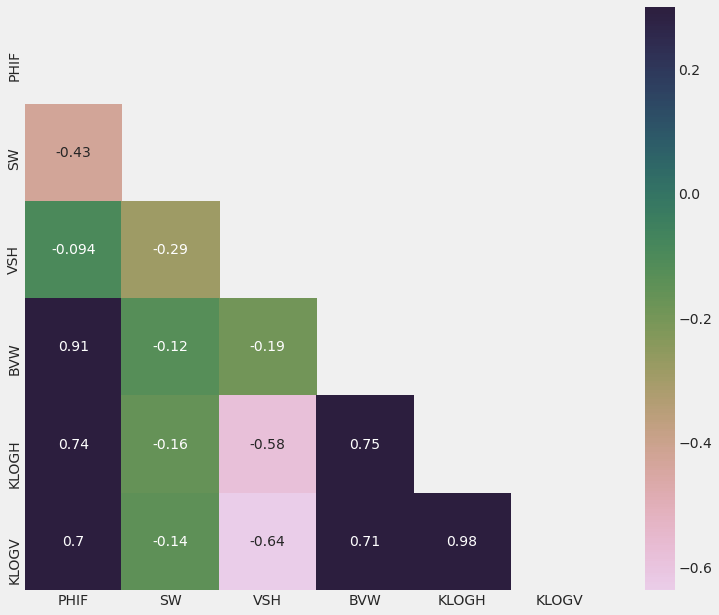

In [152]:
well_train_only_features = well_train[train_features]

# Generate a mask for the upper triangle
mask = np.zeros_like(well_train_only_features.corr(method = 'spearman') , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(12,10))
sns.heatmap(well_train_only_features.corr(method = 'spearman') ,annot=True,  mask=mask, cmap=cmap, vmax=.3, square=True)

plt.show()

## Step 4. Normalization

In [153]:
colnames = well_train.columns
only_feature = ['PHIF','SW','VSH','BVW', 'KLOGH'] # only feature column names
only_target = 'KLOGV' # only target column names
feature_target = np.append(only_feature, only_target) # feature and target column names

colnames

Index(['PHIF', 'SW', 'VSH', 'BVW', 'KLOGH', 'KLOGV', 'WELL', 'DEPTH'], dtype='object')

In [154]:
np.isnan(well1.any()) #and gets False
np.isfinite(well1.all()) #and gets True

DEPTH    True
PHIF     True
SW       True
VSH      True
BVW      True
KLOGH    True
dtype: bool

In [155]:
np.isnan(well2.any()) #and gets False
np.isfinite(well2.all()) #and gets True

DEPTH    True
PHIF     True
SW       True
VSH      True
BVW      True
KLOGH    True
KLOGV    True
dtype: bool

In [156]:
np.isnan(well3.any()) #and gets False
np.isfinite(well3.all()) #and gets True

DEPTH    True
PHIF     True
SW       True
VSH      True
BVW      True
KLOGH    True
KLOGV    True
dtype: bool

In [157]:
well_train.head()

PHIF   SW  VSH  BVW  KLOGH  KLOGV         WELL   DEPTH
1850  0.21 0.96 0.20 0.20  76.51  56.66  15_9-19 BT2 4050.03
1851  0.22 0.96 0.19 0.21 121.38  92.49  15_9-19 BT2 4050.18
1852  0.21 0.97 0.20 0.21  88.50  66.14  15_9-19 BT2 4050.33
1853  0.21 0.91 0.21 0.19  67.61  49.69  15_9-19 BT2 4050.49
1854  0.22 0.87 0.29 0.19  15.81  10.62  15_9-19 BT2 4050.64

In [158]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

# transform the RT to logarithmic
#well_train['KLOGH'] = np.log10(well_train['KLOGH'])

# normalize using power transform Yeo-Johnson method
scaler = PowerTransformer(method='yeo-johnson')

## ColumnTransformer
column_drop = ['WELL', 'DEPTH']
ct = ColumnTransformer([('transform', scaler, feature_target)], remainder='passthrough')

## fit and transform
well_train_norm = ct.fit_transform(well_train)

## convert to dataframe
well_train_norm = pd.DataFrame(well_train_norm, columns=colnames)
well_train_norm

PHIF    SW   VSH   BVW KLOGH KLOGV         WELL   DEPTH
0     0.67 -0.16 -0.36  0.79  0.97  0.95  15_9-19 BT2 4050.03
1     0.85 -0.36 -0.50  0.92  1.09  1.08  15_9-19 BT2 4050.18
2     0.75  0.07 -0.40  0.93  1.01  0.99  15_9-19 BT2 4050.33
3     0.73 -1.11 -0.30  0.55  0.93  0.91  15_9-19 BT2 4050.49
4     0.91 -1.43  0.33  0.54  0.46  0.38  15_9-19 BT2 4050.64
...    ...   ...   ...   ...   ...   ...          ...     ...
1800 -1.40  0.79  0.81 -1.31 -1.09 -1.08   15_9-19 SR 4549.29
1801 -1.44  0.79  0.81 -1.31 -1.09 -1.08   15_9-19 SR 4549.44
1802 -1.46  0.79  0.98 -1.36 -1.09 -1.08   15_9-19 SR 4549.60
1803 -1.51  0.79  1.12 -1.38 -1.10 -1.09   15_9-19 SR 4549.75
1804 -1.57  0.79  1.29 -1.44 -1.10 -1.09   15_9-19 SR 4549.90

[1805 rows x 8 columns]

In [159]:
x = well_train_norm[feature_target].astype(float)
y = well_train_norm['WELL'].astype(str)
z = well_train_norm['DEPTH'].astype(float)

well_train_norm = pd.concat([x, y, z], axis=1)

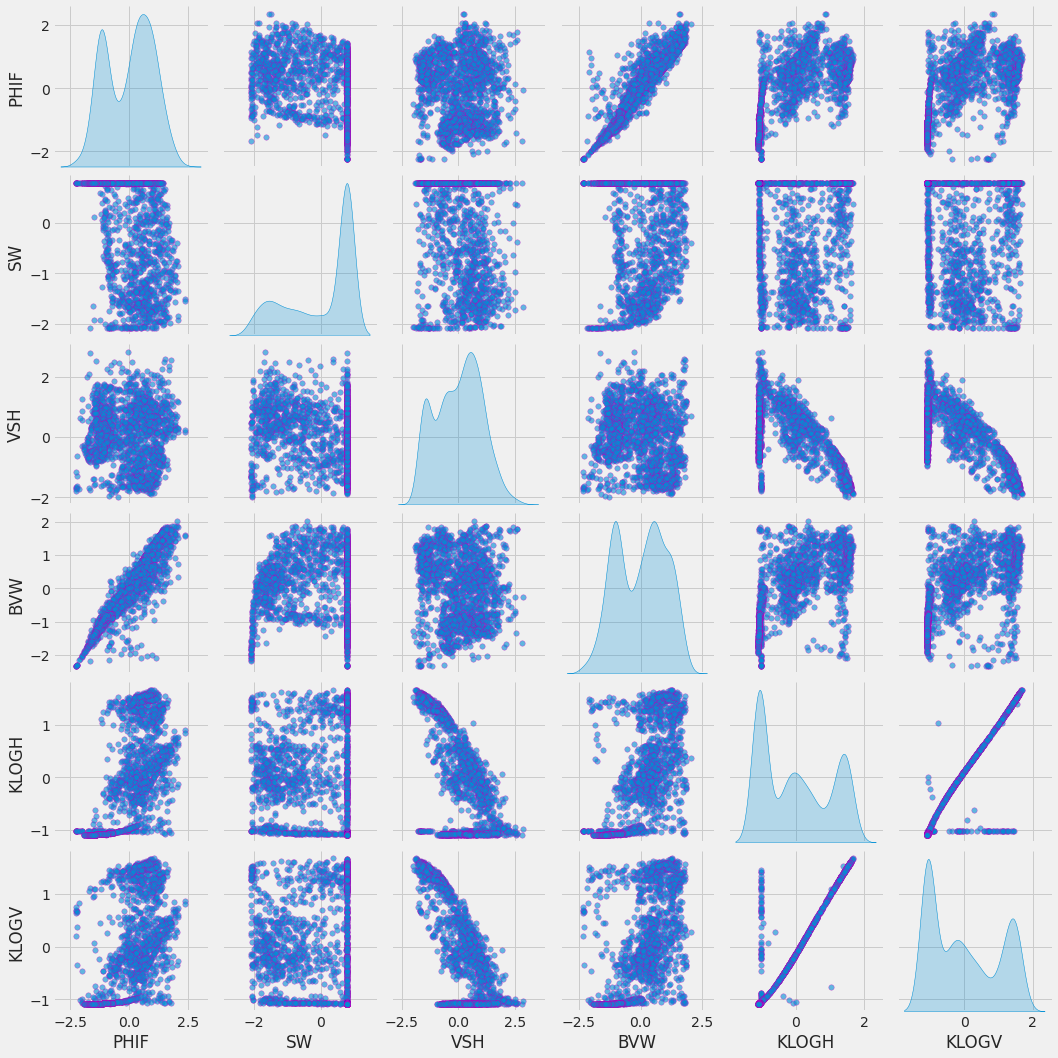

In [160]:
 x = well_train_norm[feature_target].astype(float)
sns.pairplot(well_train_norm, vars=feature_target, diag_kind = 'kde',
            plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'm'})

## Step 5. Removing Outliers

In [161]:
# make copy of well_train_norm, called well_train_dropped
well_train_drop = well_train_norm.copy()

# on the well_train_drop, drop WELL and DEPTH column
well_train_drop = well_train_norm.drop(['WELL', 'DEPTH'], axis=1)

In [162]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Method 1: Standard Deviation Method (traditional)
well_train_std = well_train_drop[np.abs(well_train_drop - well_train_drop.mean()) <= (3 * well_train_drop.std())]

## delete all rows that have NaNs
well_train_std = well_train_std.dropna()

# Method 2: Isolation Forest
iso = IsolationForest(contamination=0.5)
yhat = iso.fit_predict(well_train_drop)
mask = yhat != -1
well_train_iso = well_train_norm[mask]

# Method 3: Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(well_train_drop)
mask = yhat != -1
well_train_ee = well_train_norm[mask]

# Method 4: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.3)
yhat = lof.fit_predict(well_train_drop)
mask = yhat != -1
well_train_lof = well_train_norm[mask]

# Method 5: One-class SVM
svm = OneClassSVM(nu=0.1)
yhat = svm.fit_predict(well_train_drop)
mask = yhat != -1
well_train_svm = well_train_norm[mask]

Number of points before outliers removed                       : 1805
Number of points after outliers removed with Isolation Forest  : 903
Number of points after outliers removed with Outlier Factor    : 1263
Number of points after outliers removed with One-class SVM     : 1624
Number of points after outliers removed with Min. Covariance   : 1624
Number of points after outliers removed with Standard Deviation: 1805


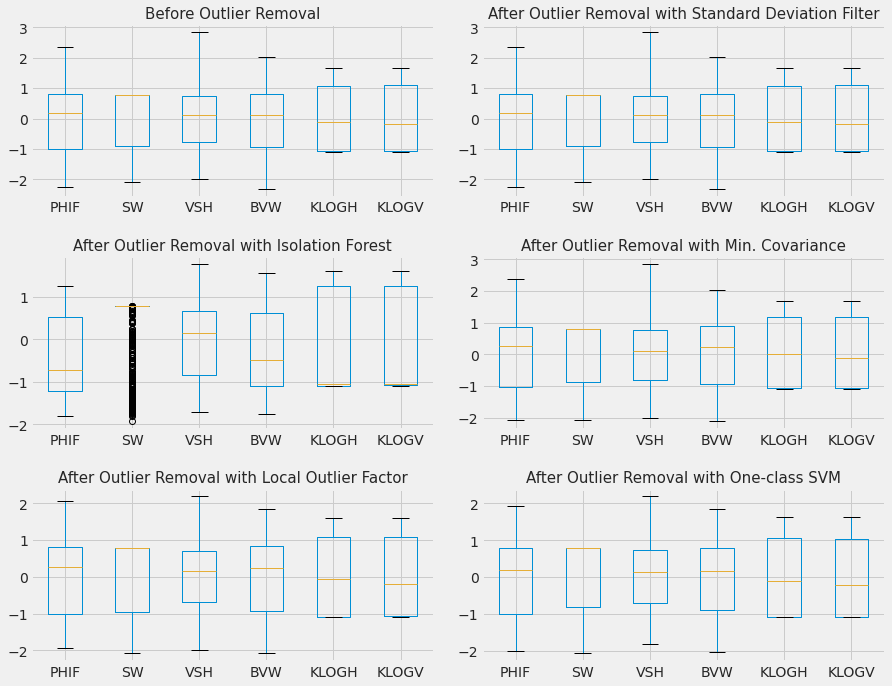

In [163]:
print('Number of points before outliers removed                       :', len(well_train_norm))
print('Number of points after outliers removed with Isolation Forest  :', len(well_train_iso))
print('Number of points after outliers removed with Outlier Factor    :', len(well_train_lof))
print('Number of points after outliers removed with One-class SVM     :', len(well_train_svm))
print('Number of points after outliers removed with Min. Covariance   :', len(well_train_ee))
print('Number of points after outliers removed with Standard Deviation:', len(well_train_std))

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
well_train_norm[feature_target].boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
well_train_std[feature_target].boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
well_train_iso[feature_target].boxplot()
plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
well_train_ee[feature_target].boxplot()
plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
well_train_lof[feature_target].boxplot()
plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
well_train_svm[feature_target].boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout(1.7)
plt.show()

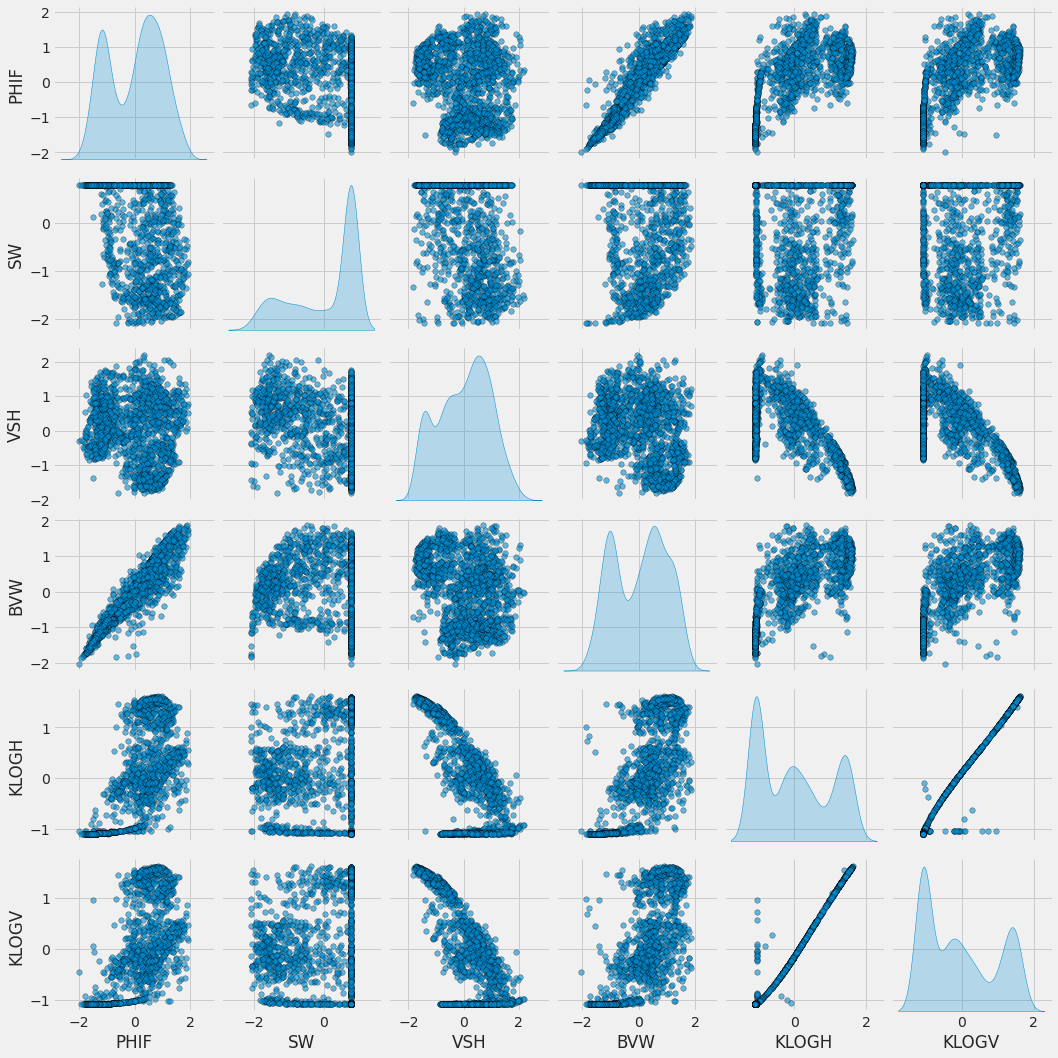

In [164]:
sns.pairplot(well_train_svm, vars=feature_target,
            diag_kind='kde',
            plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

In [229]:
well_train_svm.describe()

PHIF      SW     VSH     BVW   KLOGH   KLOGV   DEPTH
count 1624.00 1624.00 1624.00 1624.00 1624.00 1624.00 1624.00
mean     0.00    0.04    0.01    0.03    0.00   -0.03 4322.13
std      0.96    0.96    0.93    0.94    0.98    0.99  184.80
min     -2.00   -2.08   -1.82   -2.03   -1.10   -1.09 4050.03
25%     -0.99   -0.81   -0.71   -0.90   -1.08   -1.07 4119.49
50%      0.20    0.79    0.13    0.17   -0.10   -0.22 4420.90
75%      0.78    0.79    0.73    0.79    1.05    1.05 4485.63
max      1.93    0.79    2.19    1.86    1.62    1.62 4549.90

## Step 5. Prediction! First Attempt

In [165]:
# Define the train data
feature = ['PHIF','SW','VSH','BVW', 'KLOGH']
target = 'KLOGV'

X_train = well_train_svm[only_feature].values
y_train = well_train_svm[only_target].values



In [166]:
well_train_svm

PHIF    SW   VSH   BVW  KLOGH  KLOGV         WELL   DEPTH
0     0.67 -0.16 -0.36  0.79   0.97   0.95  15_9-19 BT2 4050.03
1     0.85 -0.36 -0.50  0.92   1.09   1.08  15_9-19 BT2 4050.18
2     0.75  0.07 -0.40  0.93   1.01   0.99  15_9-19 BT2 4050.33
3     0.73 -1.11 -0.30  0.55   0.93   0.91  15_9-19 BT2 4050.49
4     0.91 -1.43  0.33  0.54   0.46   0.38  15_9-19 BT2 4050.64
...    ...   ...   ...   ...    ...    ...          ...     ...
1800 -1.40  0.79  0.81 -1.31  -1.09  -1.08   15_9-19 SR 4549.29
1801 -1.44  0.79  0.81 -1.31  -1.09  -1.08   15_9-19 SR 4549.44
1802 -1.46  0.79  0.98 -1.36  -1.09  -1.08   15_9-19 SR 4549.60
1803 -1.51  0.79  1.12 -1.38  -1.10  -1.09   15_9-19 SR 4549.75
1804 -1.57  0.79  1.29 -1.44  -1.10  -1.09   15_9-19 SR 4549.90

[1624 rows x 8 columns]

In [167]:
# Define the test data 
well_pred1 = well_train_norm.copy()

names_train = ['15_9-19 BT2', '15_9-19 SR']

X_test = []

y_test = []
for i in range(len(names_train)):
  # split the df with respect to its name
  test = well_pred1.loc[well_pred1['WELL'] == names_train[i]]

  # Drop well name column 
  test = test.drop(['WELL'], axis=1)

  # define X_test (feature) and y_test (target)
  X_test_, y_test_ = test[only_feature].values, test[only_target].values
  
  X_test.append(X_test_)
  y_test.append(y_test_)

# for each well 1, 3, and 4
X_test1, X_test2 = X_test
y_test1, y_test2 = y_test

In [168]:
X_test1

array([[ 0.66964863, -0.16134476, -0.36427966,  0.79089603,  0.96773731],
       [ 0.84866104, -0.36207483, -0.4971861 ,  0.91554142,  1.08935511],
       [ 0.75407238,  0.06665776, -0.3971556 ,  0.92546969,  1.0074061 ],
       ...,
       [ 0.72643846,  0.17842136,  0.72115455,  0.92055267, -0.01325607],
       [ 1.09507329, -0.42890656,  1.12180926,  1.13147665, -0.3515317 ],
       [ 1.00702272, -0.17907778,  1.0554514 ,  1.11750956, -0.30294063]])

## Step 6 Ensemble learning GradientBoostingRegressor

R-squared of Well 2: 0.9823600497855499
RMSE of Well 2: 0.11652450501773982


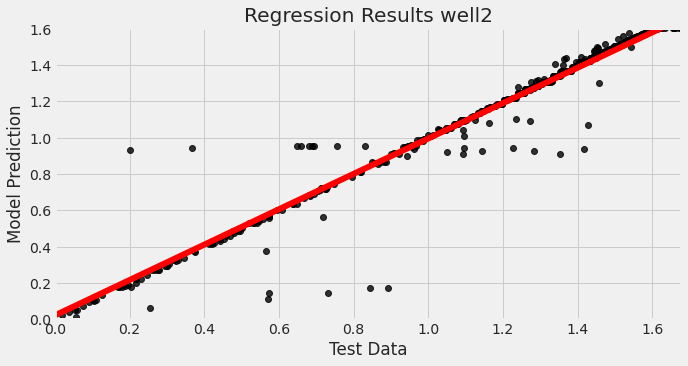

<Figure size 720x360 with 0 Axes>

R-squared of Well 3: 0.9962242918056654
RMSE of Well 3: 0.0341759149087276


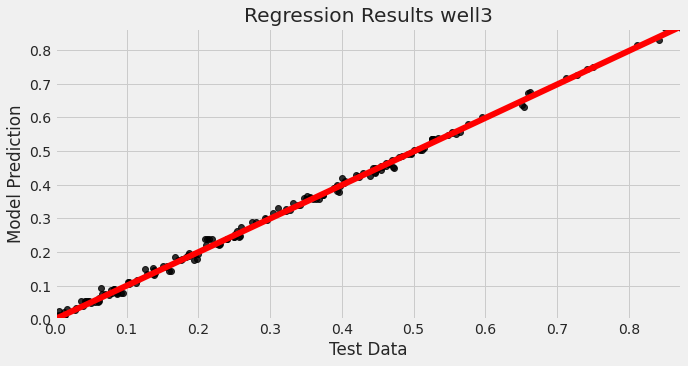

In [169]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# Create the regressor
model = GradientBoostingRegressor()
# print(model)

# Fit the regressor to the training data
model.fit(X_train, y_train)

# Predict on well 2
y_pred1 = model.predict(X_test1)
#reg_metrics(y_test1, y_pred1)
print("R-squared of Well 2: {}".format(model.score(X_test1, y_test1)))
rmse = np.sqrt(mean_squared_error(y_test1, y_pred1))
print("RMSE of Well 2: {}".format(rmse))
def reg_plot(test, pred):
    plt.figure(figsize=(10,5))
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results well2')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.figure(figsize=(10,5)) 
    plt.show()
reg_plot(y_test1, y_pred1)
# Predict on well 3
y_pred2 = model.predict(X_test2)
print("R-squared of Well 3: {}".format(model.score(X_test2, y_test2)))
rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))
print("RMSE of Well 3: {}".format(rmse))
def reg_plot(test, pred):
    plt.figure(figsize=(10,5))
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results well3')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
     
    plt.show()
reg_plot(y_test2, y_pred2)

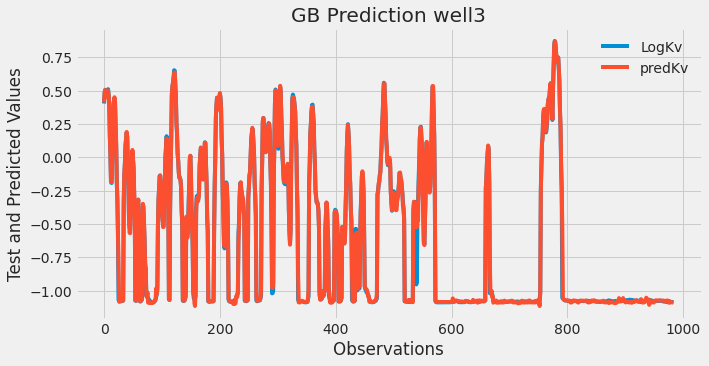

In [170]:
plt.figure(figsize=(10,5)) 
plt.plot(y_test2,label = "LogKv")
plt.plot(y_pred2,label ="predKv")
plt.title("Test and Predicted Values")
plt.title('GB Prediction well3')
plt.xlabel('Observations')
plt.ylabel('Test and Predicted Values')
plt.legend()

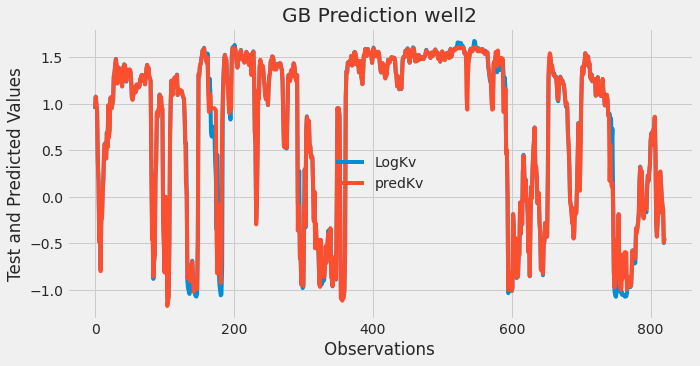

In [171]:
plt.figure(figsize=(10,5)) 
plt.plot(y_test1,label = "LogKv")
plt.plot(y_pred1,label ="predKv")
plt.title("Test and Predicted Values")
plt.title('GB Prediction well2')
plt.xlabel('Observations')
plt.ylabel('Test and Predicted Values')
plt.legend()

In [172]:
#df1 = pd.DataFrame(y_pred2, columns = ['b'])
#df1.head()

R-squared of Well 2: 0.9393152804510662
RMSE of Well 2: 0.2161266211193029


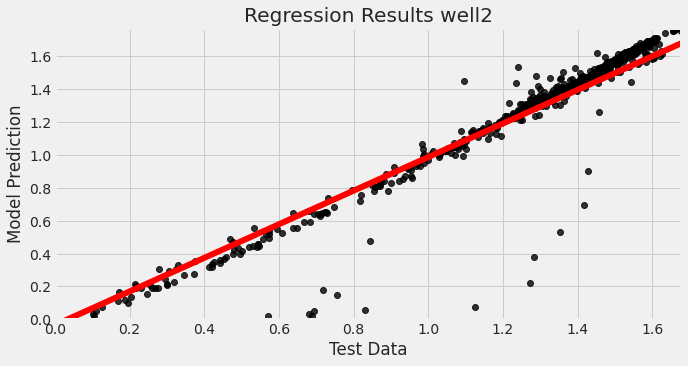

<Figure size 720x360 with 0 Axes>

R-squared of Well 3: 0.9851040620900114
RMSE of Well 3: 0.06788203685083076


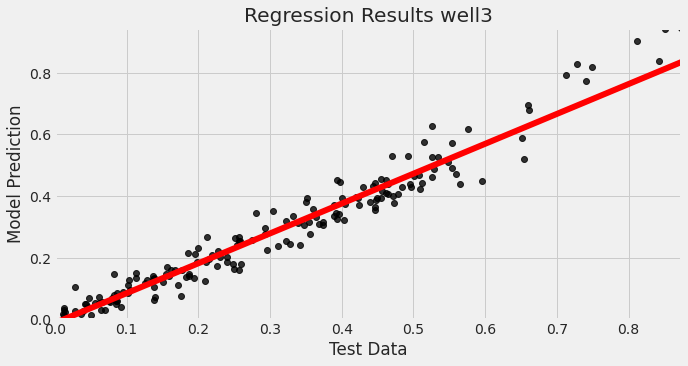

In [173]:
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_reg.fit(X_train, y_train)
# Prediction on test data

# Regression Plot - SVR
# Predict on well 2    
y_pred1 = svr_reg.predict(X_test1)
print("R-squared of Well 2: {}".format(svr_reg.score(X_test1, y_test1)))
rmse = np.sqrt(mean_squared_error(y_test1, y_pred1))
print("RMSE of Well 2: {}".format(rmse))
def reg_plot(test, pred):
    plt.figure(figsize=(10,5))
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results well2')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.figure(figsize=(10,5)) 
    plt.show()
reg_plot(y_test1, y_pred1)
# Predict on well 3
y_pred2 = svr_reg.predict(X_test2)
print("R-squared of Well 3: {}".format(svr_reg.score(X_test2, y_test2)))
rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))
print("RMSE of Well 3: {}".format(rmse))
def reg_plot(test, pred):
    plt.figure(figsize=(10,5))
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results well3')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.show()
reg_plot(y_test2, y_pred2)


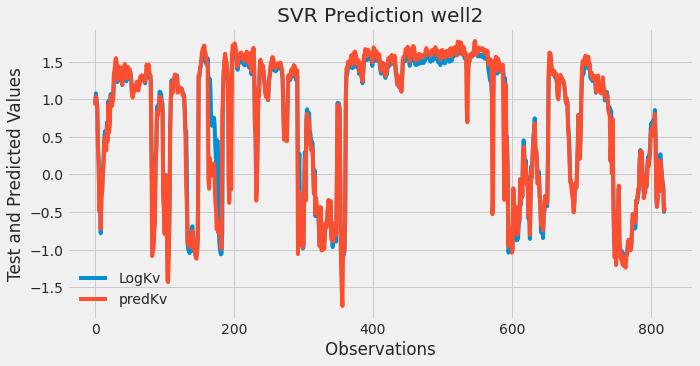

In [174]:
plt.figure(figsize=(10,5)) 
plt.plot(y_test1,label = "LogKv")
plt.plot(y_pred1,label ="predKv")
plt.title("Test and Predicted Values")
plt.title('SVR Prediction well2')
plt.xlabel('Observations')
plt.ylabel('Test and Predicted Values')
plt.legend()

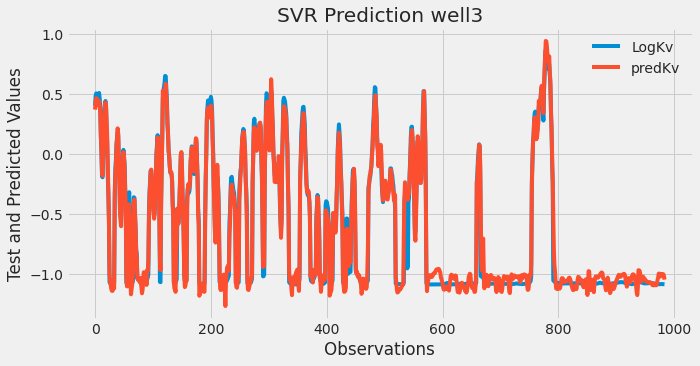

In [175]:
plt.figure(figsize=(10,5)) 
plt.plot(y_test2,label = "LogKv")
plt.plot(y_pred2,label ="predKv")
plt.title("Test and Predicted Values")
plt.title('SVR Prediction well3')
plt.xlabel('Observations')
plt.ylabel('Test and Predicted Values')
plt.legend()

R-squared of Well 2: 0.986581946498249
RMSE of Well 2: 0.10162799296217406


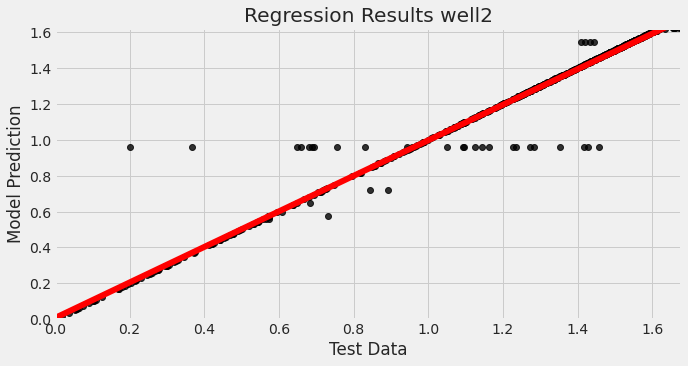

<Figure size 720x360 with 0 Axes>

R-squared of Well 3: 0.9999985612286167
RMSE of Well 3: 0.0006671397749226703


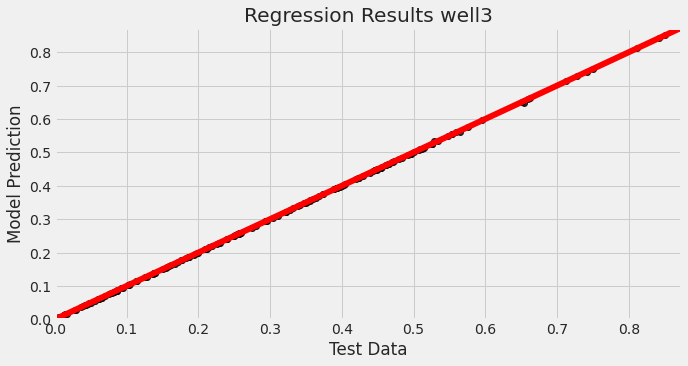

In [176]:
# 3. Decision Tree - Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
# Prediction on test data
y_pred1 = dt_reg.predict(X_test1)
print("R-squared of Well 2: {}".format(dt_reg.score(X_test1, y_test1)))
rmse = np.sqrt(mean_squared_error(y_test1, y_pred1))
print("RMSE of Well 2: {}".format(rmse))
def reg_plot(test, pred):
    plt.figure(figsize=(10,5))
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results well2')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.figure(figsize=(10,5)) 
    plt.show()
reg_plot(y_test1, y_pred1)
# Predict on well 3
y_pred2 = dt_reg.predict(X_test2)
print("R-squared of Well 3: {}".format(dt_reg.score(X_test2, y_test2)))
rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))
print("RMSE of Well 3: {}".format(rmse))
def reg_plot(test, pred):
    plt.figure(figsize=(10,5))
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results well3')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.show()
reg_plot(y_test2, y_pred2)



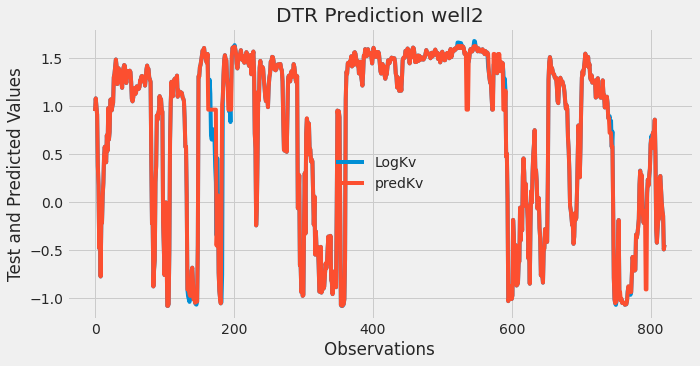

In [177]:
plt.figure(figsize=(10,5)) 
plt.plot(y_test1,label = "LogKv")
plt.plot(y_pred1,label ="predKv")
plt.title("Test and Predicted Values")
plt.title('DTR Prediction well2')
plt.xlabel('Observations')
plt.ylabel('Test and Predicted Values')
plt.legend()

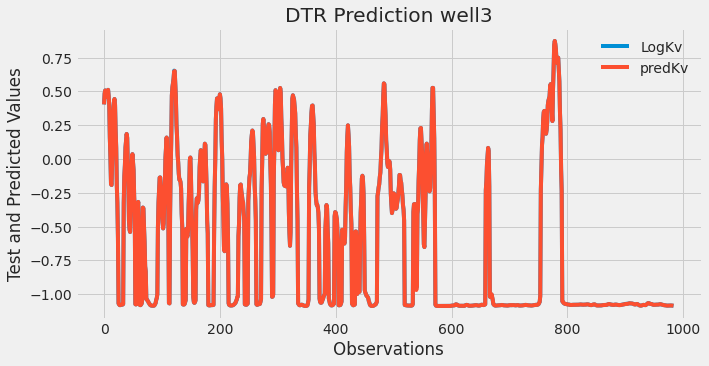

In [178]:
plt.figure(figsize=(10,5)) 
plt.plot(y_test2,label = "LogKv")
plt.plot(y_pred2,label ="predKv")
plt.title("Test and Predicted Values")
plt.title('DTR Prediction well3')
plt.xlabel('Observations')
plt.ylabel('Test and Predicted Values')
plt.legend()

-0.031159919334636695
[ 0.08221961  0.03393186 -0.08236639 -0.05249315  0.91660062]
R-squared of Well 2: 0.7957357193707739
RMSE of Well 2: 0.3965197317298329


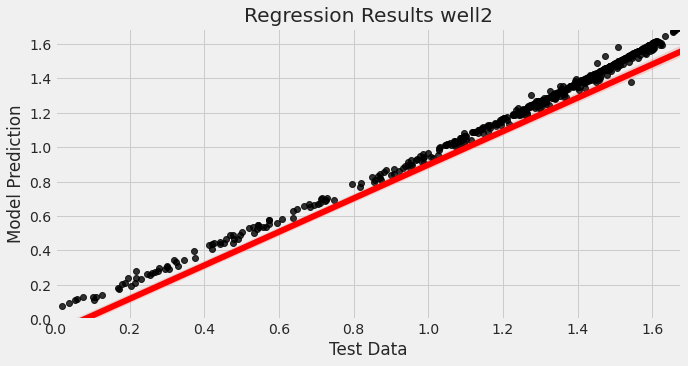

<Figure size 720x360 with 0 Axes>

R-squared of Well 3: 0.98687266394081
RMSE of Well 3: 0.06372491137134956


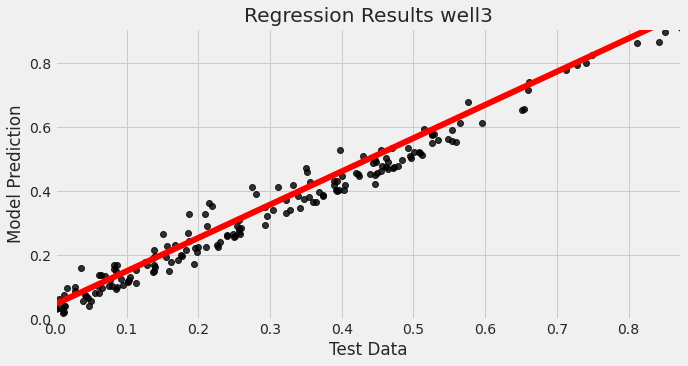

In [179]:
# 1. MLR - Multi Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # training the algorithm
print(lin_reg.intercept_)  # intercept
print(lin_reg.coef_)  # coefficients
# Prediction on test data
y_pred_lin = lin_reg.predict(X_test1)
print("R-squared of Well 2: {}".format(lin_reg.score(X_test1, y_test1)))
rmse = np.sqrt(mean_squared_error(y_test1, y_pred_lin))
print("RMSE of Well 2: {}".format(rmse))
def reg_plot(test, pred):
    plt.figure(figsize=(10,5))
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results well2')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.figure(figsize=(10,5)) 
    plt.show()
reg_plot(y_test1,y_pred_lin)
# Predict on well 3
y_pred_lin2 = lin_reg.predict(X_test2)
print("R-squared of Well 3: {}".format(lin_reg.score(X_test2, y_test2)))
rmse = np.sqrt(mean_squared_error(y_test2, y_pred_lin2))
print("RMSE of Well 3: {}".format(rmse))
def reg_plot(test, pred):
    plt.figure(figsize=(10,5))
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results well3')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.show()
reg_plot(y_test2,  y_pred_lin2)



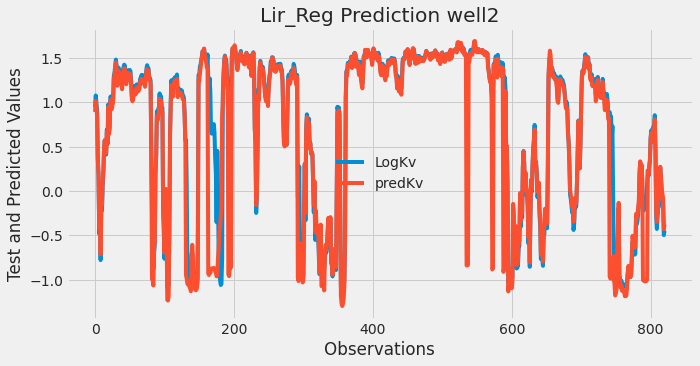

In [180]:
plt.figure(figsize=(10,5)) 
plt.plot(y_test1,label = "LogKv")
plt.plot( y_pred_lin,label ="predKv")
plt.title("Test and Predicted Values")
plt.title('Lir_Reg Prediction well2')
plt.xlabel('Observations')
plt.ylabel('Test and Predicted Values')
plt.legend()

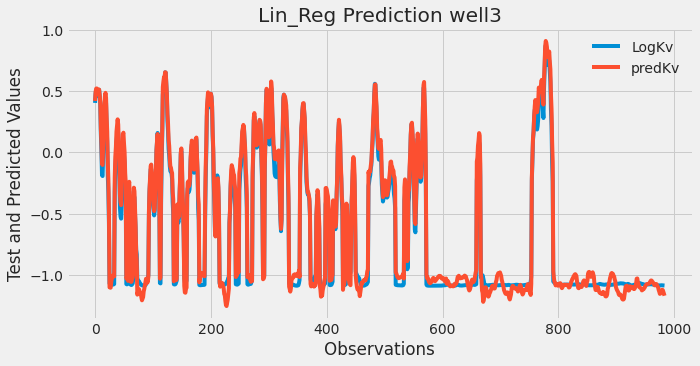

In [181]:
plt.figure(figsize=(10,5)) 
plt.plot(y_test2,label = "LogKv")
plt.plot(y_pred_lin2,label ="predKv")
plt.title("Test and Predicted Values")
plt.title('Lin_Reg Prediction well3')
plt.xlabel('Observations')
plt.ylabel('Test and Predicted Values')
plt.legend()

R-squared of Well 2: 0.9735451436132517
RMSE of Well 2: 0.14269911949362957


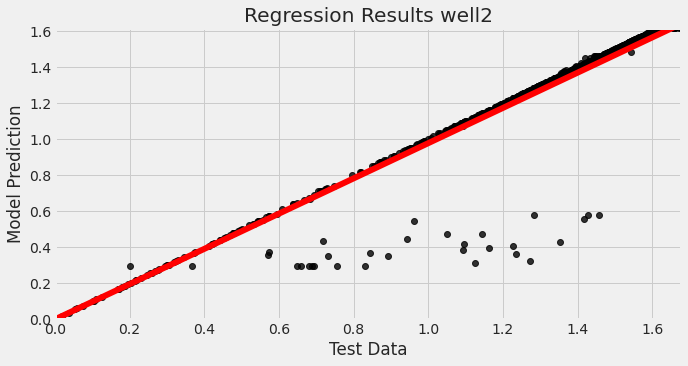

<Figure size 720x360 with 0 Axes>

R-squared of Well 3: 0.9990085388658333
RMSE of Well 3: 0.06372491137134956


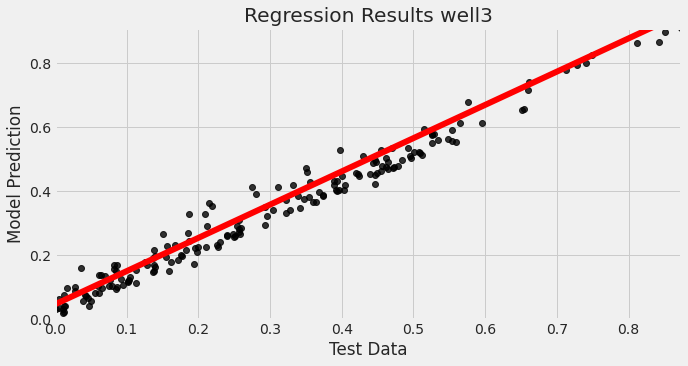

In [182]:
# 4. Random Forest - Regression
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
# Prediction on test data
y_pred1 = rf_reg.predict(X_test1)
print("R-squared of Well 2: {}".format(rf_reg.score(X_test1, y_test1)))
rmse = np.sqrt(mean_squared_error(y_test1, y_pred1))
print("RMSE of Well 2: {}".format(rmse))
def reg_plot(test, pred):
    plt.figure(figsize=(10,5))
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results well2')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.figure(figsize=(10,5)) 
    plt.show()
reg_plot(y_test1, y_pred1)
# Predict on well 3
y_pred2 = lin_reg.predict(X_test2)
print("R-squared of Well 3: {}".format(rf_reg.score(X_test2, y_test2)))
rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))
print("RMSE of Well 3: {}".format(rmse))
def reg_plot(test, pred):
    plt.figure(figsize=(10,5))
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results well3')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.show()
reg_plot(y_test2, y_pred2)



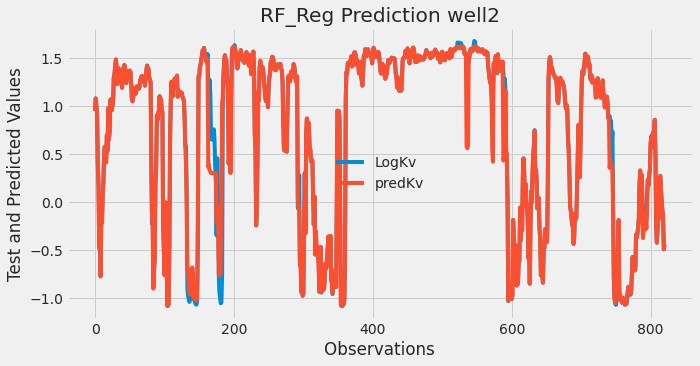

In [183]:
plt.figure(figsize=(10,5)) 
plt.plot(y_test1,label = "LogKv")
plt.plot(y_pred1,label ="predKv")
plt.title("Test and Predicted Values")
plt.title('RF_Reg Prediction well2')
plt.xlabel('Observations')
plt.ylabel('Test and Predicted Values')
plt.legend()

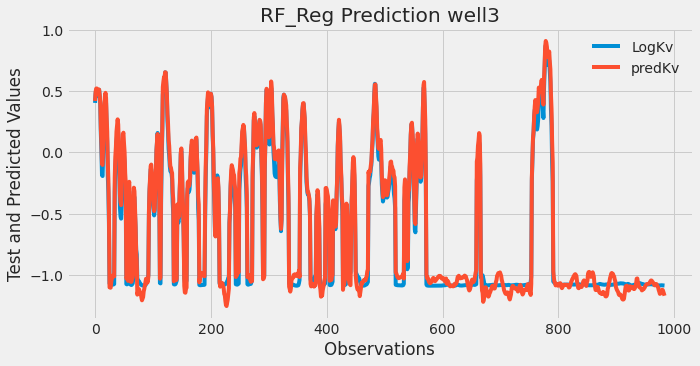

In [184]:
plt.figure(figsize=(10,5)) 
plt.plot(y_test2,label = "LogKv")
plt.plot(y_pred2,label ="predKv")
plt.title("Test and Predicted Values")
plt.title('RF_Reg Prediction well3')
plt.xlabel('Observations')
plt.ylabel('Test and Predicted Values')
plt.legend()

In [185]:
import lightgbm as lgb
import xgboost as xgb

[10:00:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-squared of Well 2: 0.9791104199404255
RMSE of Well 2: 0.12680414322009312


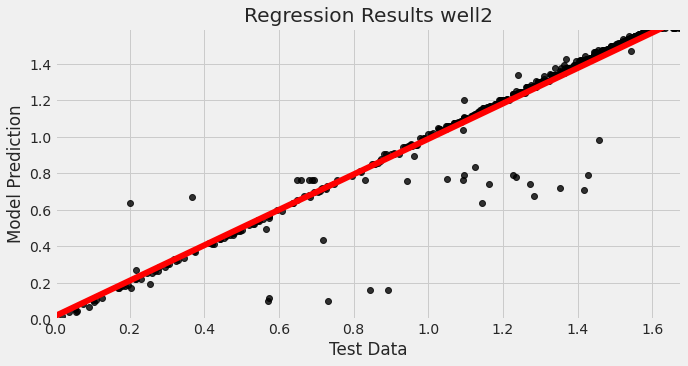

<Figure size 720x360 with 0 Axes>

R-squared of Well 2: 0.9967195532351261
RMSE of Well 2: 0.03185572075316071


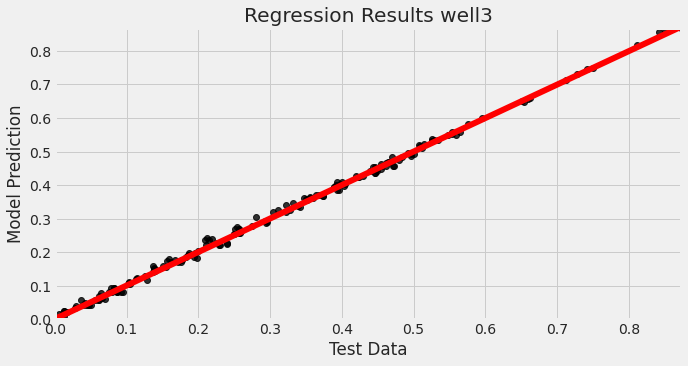

In [186]:
# 5. XGBoost - Regression
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
# Prediction on test data
y_pred1 = xgb_reg.predict(X_test1)
print("R-squared of Well 2: {}".format(xgb_reg.score(X_test1, y_test1)))
rmse = np.sqrt(mean_squared_error(y_test1, y_pred1))
print("RMSE of Well 2: {}".format(rmse))
def reg_plot(test, pred):
    plt.figure(figsize=(10,5))
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results well2')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.figure(figsize=(10,5)) 
    plt.show()
reg_plot(y_test1,y_pred1)
# Predict on well 3
y_pred2 = xgb_reg.predict(X_test2)
print("R-squared of Well 2: {}".format(xgb_reg.score(X_test2, y_test2)))
rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))
print("RMSE of Well 2: {}".format(rmse))
def reg_plot(test, pred):
    plt.figure(figsize=(10,5))
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results well3')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.show()
reg_plot(y_test2,y_pred2)


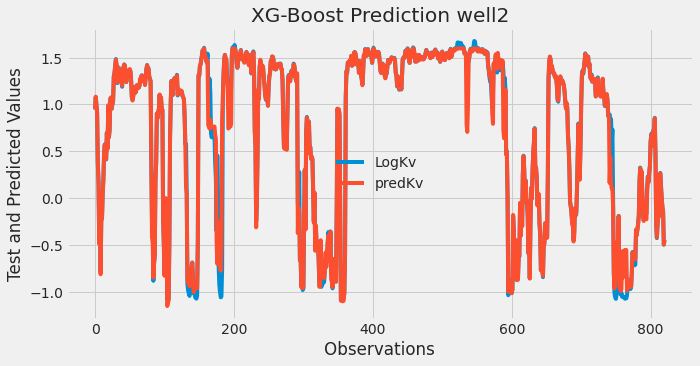

In [187]:
plt.figure(figsize=(10,5)) 
plt.plot(y_test1,label = "LogKv")
plt.plot(y_pred1,label ="predKv")
plt.title("Test and Predicted Values")
plt.title('XG-Boost Prediction well2')
plt.xlabel('Observations')
plt.ylabel('Test and Predicted Values')
plt.legend()

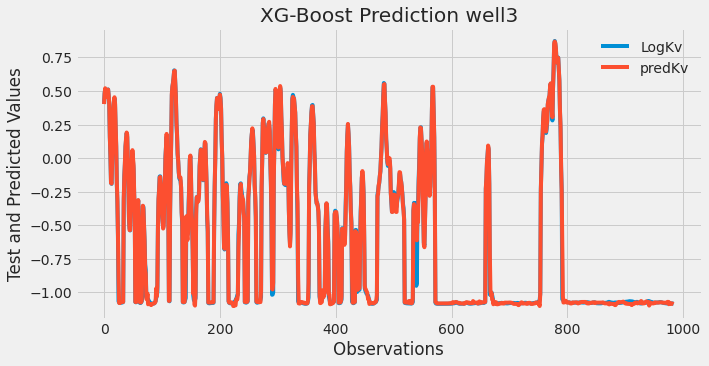

In [188]:
plt.figure(figsize=(10,5)) 
plt.plot(y_test2,label = "LogKv")
plt.plot(y_pred2,label ="predKv")
plt.title("Test and Predicted Values")
plt.title('XG-Boost Prediction well3')
plt.xlabel('Observations')
plt.ylabel('Test and Predicted Values')
plt.legend()

In [189]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

R-squared of Well 2: 0.8508864023941483
RMSE of Well 2: 0.338787371542987


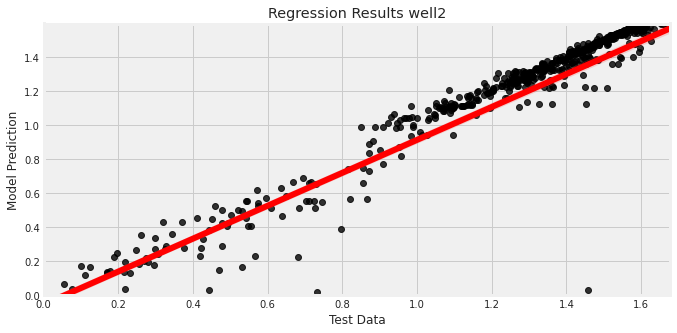

<Figure size 720x360 with 0 Axes>

R-squared of Well 2: 0.9873008751205719
RMSE of Well 2: 0.0626769472388543


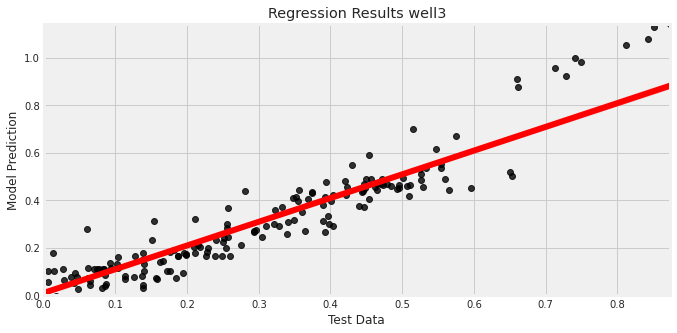

In [190]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_
y_pred1 =model.predict(X_test1)
print("R-squared of Well 2: {}".format(model.score(X_test1, y_test1)))
rmse = np.sqrt(mean_squared_error(y_test1, y_pred1))
print("RMSE of Well 2: {}".format(rmse))
def reg_plot(test, pred):
    plt.figure(figsize=(10,5))
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results well2')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.figure(figsize=(10,5)) 
    plt.show()
reg_plot(y_test1,y_pred1)
# Predict on well 3
y_pred2 = model.predict(X_test2)
print("R-squared of Well 2: {}".format(model.score(X_test2, y_test2)))
rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))
print("RMSE of Well 2: {}".format(rmse))
def reg_plot(test, pred):
    plt.figure(figsize=(10,5))
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results well3')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.show()
reg_plot(y_test2,y_pred2)



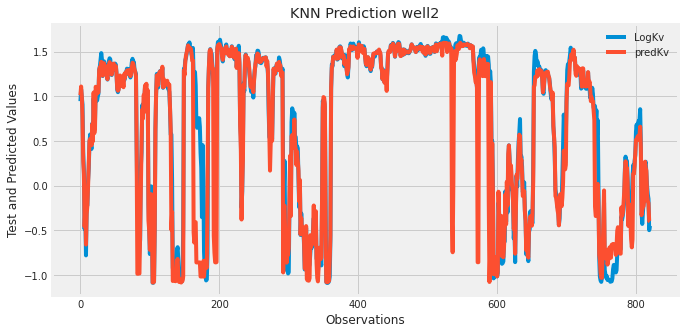

In [191]:
plt.figure(figsize=(10,5)) 
plt.plot(y_test1,label = "LogKv")
plt.plot(y_pred1,label ="predKv")
plt.title("Test and Predicted Values")
plt.title('KNN Prediction well2')
plt.xlabel('Observations')
plt.ylabel('Test and Predicted Values')
plt.legend()

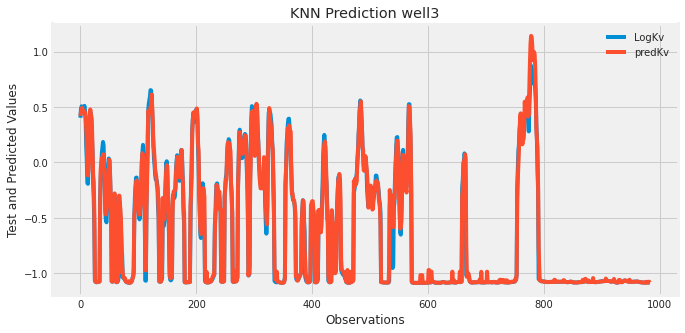

In [192]:
plt.figure(figsize=(10,5)) 
plt.plot(y_test2,label = "LogKv")
plt.plot(y_pred2,label ="predKv")
plt.title("Test and Predicted Values")
plt.title('KNN Prediction well3')
plt.xlabel('Observations')
plt.ylabel('Test and Predicted Values')
plt.legend()

In [193]:
# make the transformer fit to the target
y = well_train[target].values
scaler.fit(y.reshape(-1,1))

# denormalize y_test, y_pred
y_test1, y_pred1 = scaler.inverse_transform(y_test1.reshape(-1,1)), scaler.inverse_transform(y_pred1.reshape(-1,1))
y_test2, y_pred2 = scaler.inverse_transform(y_test2.reshape(-1,1)), scaler.inverse_transform(y_pred2.reshape(-1,1))


In [194]:
y_test1.shape

(821, 1)

In [195]:
y_pred1.shape

(821, 1)

In [196]:
y_test2.shape

(984, 1)

In [197]:
models = [' GradientBoostingRegressor','svm','decision_tree','linear_regression','xgboost','random_forest','knn']
model_train_acc=[]


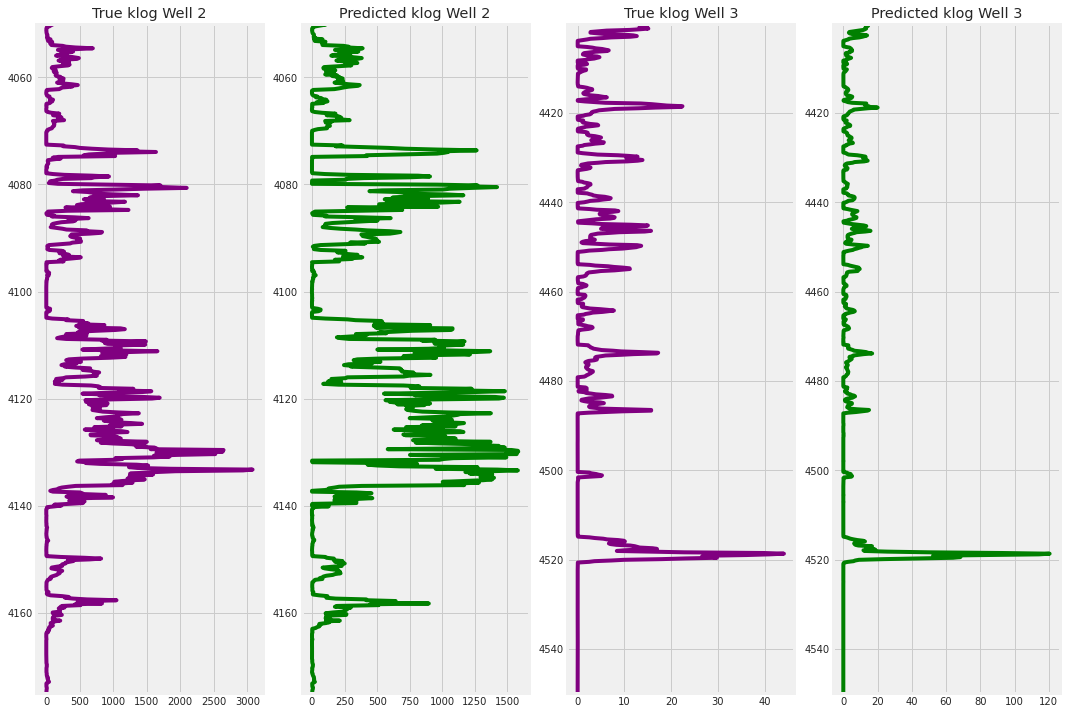

In [198]:
x = [y_test1, y_pred1, y_test2, y_pred2]
y = [well2['DEPTH'], well2['DEPTH'], well3['DEPTH'], well3['DEPTH']]

color = ['purple', 'green', 'purple', 'green']
title = ['True klog Well 2', 'Predicted klog Well 2', 'True klog Well 3', 'Predicted klog Well 3']
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,10))

for i in range(len(x)):
  ax[i].plot(x[i], y[i], color=color[i])
  #ax[0].set_xlim(0, 2500)
  #ax[1].set_xlim(0, 3000)
  ax[i].set_ylim(np.max(y[i]), np.min(y[i]))
  ax[i].set_title(title[i])

plt.tight_layout(1)

plt.show()


In [199]:
well_train_svm

PHIF    SW   VSH   BVW  KLOGH  KLOGV         WELL   DEPTH
0     0.67 -0.16 -0.36  0.79   0.97   0.95  15_9-19 BT2 4050.03
1     0.85 -0.36 -0.50  0.92   1.09   1.08  15_9-19 BT2 4050.18
2     0.75  0.07 -0.40  0.93   1.01   0.99  15_9-19 BT2 4050.33
3     0.73 -1.11 -0.30  0.55   0.93   0.91  15_9-19 BT2 4050.49
4     0.91 -1.43  0.33  0.54   0.46   0.38  15_9-19 BT2 4050.64
...    ...   ...   ...   ...    ...    ...          ...     ...
1800 -1.40  0.79  0.81 -1.31  -1.09  -1.08   15_9-19 SR 4549.29
1801 -1.44  0.79  0.81 -1.31  -1.09  -1.08   15_9-19 SR 4549.44
1802 -1.46  0.79  0.98 -1.36  -1.09  -1.08   15_9-19 SR 4549.60
1803 -1.51  0.79  1.12 -1.38  -1.10  -1.09   15_9-19 SR 4549.75
1804 -1.57  0.79  1.29 -1.44  -1.10  -1.09   15_9-19 SR 4549.90

[1624 rows x 8 columns]

In [200]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# Define the X and y from the SVM normalized dataset
X = well_train_svm[only_feature].values
y = well_train_svm[only_target].values

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 7. Gradient Boosting for Final Prediction

In [201]:
# Define X_train and y_train
X_train = well_train[only_feature].values
# y_train = well_train[only_target].values.reshape(-1,1)
y_train = well_train[only_target].values

In [202]:
np.shape(X_train)

(1805, 5)

In [203]:
np.shape(y_train)

(1805,)

In [204]:
np.shape(X_test)

(488, 5)

In [205]:
np.shape(y_test)

(488,)

In [206]:
well_pred

PHIF   SW  VSH  BVW  KLOGH       WELL   DEPTH
1368  0.19 0.19 0.14 0.04 159.00  15_9-19 A 3875.07
1369  0.17 0.23 0.21 0.04  30.07  15_9-19 A 3875.23
1370  0.16 0.26 0.20 0.04  33.46  15_9-19 A 3875.38
1371  0.16 0.28 0.27 0.04   7.28  15_9-19 A 3875.53
1372  0.16 0.29 0.27 0.04   6.74  15_9-19 A 3875.68
...    ...  ...  ...  ...    ...        ...     ...
1954  0.08 1.00 0.64 0.08   0.02  15_9-19 A 3964.38
1955  0.08 1.00 0.66 0.08   0.02  15_9-19 A 3964.53
1956  0.10 1.00 0.59 0.10   0.12  15_9-19 A 3964.69
1957  0.12 1.00 0.53 0.12   0.46  15_9-19 A 3964.84
1958  0.14 0.98 0.47 0.13   4.52  15_9-19 A 3964.99

[591 rows x 7 columns]

In [207]:
X_test = []
depths = []


In [208]:
test = well_pred.drop(['WELL'], axis=1)

In [209]:
test

PHIF   SW  VSH  BVW  KLOGH   DEPTH
1368  0.19 0.19 0.14 0.04 159.00 3875.07
1369  0.17 0.23 0.21 0.04  30.07 3875.23
1370  0.16 0.26 0.20 0.04  33.46 3875.38
1371  0.16 0.28 0.27 0.04   7.28 3875.53
1372  0.16 0.29 0.27 0.04   6.74 3875.68
...    ...  ...  ...  ...    ...     ...
1954  0.08 1.00 0.64 0.08   0.02 3964.38
1955  0.08 1.00 0.66 0.08   0.02 3964.53
1956  0.10 1.00 0.59 0.10   0.12 3964.69
1957  0.12 1.00 0.53 0.12   0.46 3964.84
1958  0.14 0.98 0.47 0.13   4.52 3964.99

[591 rows x 6 columns]

In [210]:
only_feature

['PHIF', 'SW', 'VSH', 'BVW', 'KLOGH']

In [211]:
X_test_ = test[only_feature].values

In [212]:
X_test_

array([[1.873050e-01, 1.926000e-01, 1.441170e-01, 3.617500e-02,
        1.589987e+02],
       [1.730090e-01, 2.252000e-01, 2.117770e-01, 3.890600e-02,
        3.006650e+01],
       [1.632820e-01, 2.568000e-01, 1.979710e-01, 4.152200e-02,
        3.345910e+01],
       ...,
       [1.020860e-01, 1.000000e+00, 5.902380e-01, 1.020860e-01,
        1.220000e-01],
       [1.166990e-01, 1.000000e+00, 5.343170e-01, 1.166990e-01,
        4.632000e-01],
       [1.436770e-01, 9.774000e-01, 4.710400e-01, 1.307730e-01,
        4.524800e+00]])

In [213]:
np.shape(X_test_)

(591, 5)

In [214]:
depth_ = test['DEPTH'].values

In [215]:
depth_

array([3875.0748, 3875.2272, 3875.3796, 3875.532 , 3875.6844, 3875.8368,
       3875.9892, 3876.1416, 3876.294 , 3876.4464, 3876.5988, 3876.7512,
       3876.9036, 3877.056 , 3877.2084, 3877.3608, 3877.5132, 3877.6656,
       3877.818 , 3877.9704, 3878.1228, 3878.2752, 3878.4276, 3878.58  ,
       3878.7324, 3878.8848, 3879.0372, 3879.1896, 3879.342 , 3879.4944,
       3879.6468, 3879.7992, 3879.9516, 3880.104 , 3880.2564, 3880.4088,
       3880.5612, 3880.7136, 3880.866 , 3881.0184, 3881.1708, 3881.3232,
       3881.4756, 3881.628 , 3881.7804, 3881.9328, 3882.0852, 3882.2376,
       3882.39  , 3882.5424, 3882.6948, 3882.8472, 3882.9996, 3883.152 ,
       3883.3044, 3883.4568, 3883.6092, 3883.7616, 3883.914 , 3884.0664,
       3884.2188, 3884.3712, 3884.5236, 3884.676 , 3884.8284, 3884.9808,
       3885.1332, 3885.2856, 3885.438 , 3885.5904, 3885.7428, 3885.8952,
       3886.0476, 3886.2   , 3886.3524, 3886.5048, 3886.6572, 3886.8096,
       3886.962 , 3887.1144, 3887.2668, 3887.4192, 

In [216]:
np.shape(depth_)

(591,)

In [217]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [218]:
# Normalize X_test of well 1
X_test_ = scaler.fit_transform(X_test_)

# Predict to well 1

y_pred3 = model.predict(X_test_)

# Denormalize y_pred of well 1
# make the transformer fit to the target
y = well_train[target].values
scaler.fit(y.reshape(-1,1))

# denormalize y_test, y_pred
y_pred3 = scaler.inverse_transform(y_pred3.reshape(-1,1))


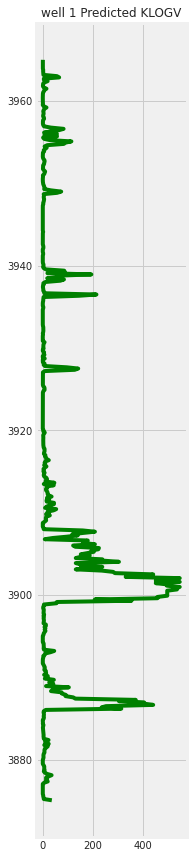

In [219]:
plt.figure(figsize=(5,12))

plt.subplot(1,2,1)
plt.plot(y_pred3, depth_, color='green')
plt.title('well 1 Predicted KLOGV', size=12)
plt.tight_layout(1)
plt.show()

In [220]:
well1['KLOGV'] = y_pred3
well1

DEPTH  PHIF   SW  VSH  BVW  KLOGH  KLOGV
1368 3875.07  0.19 0.19 0.14 0.04 159.00  35.88
1369 3875.23  0.17 0.23 0.21 0.04  30.07   3.82
1370 3875.38  0.16 0.26 0.20 0.04  33.46   3.44
1371 3875.53  0.16 0.28 0.27 0.04   7.28   1.93
1372 3875.68  0.16 0.29 0.27 0.04   6.74   1.50
...      ...   ...  ...  ...  ...    ...    ...
1954 3964.38  0.08 1.00 0.64 0.08   0.02   0.04
1955 3964.53  0.08 1.00 0.66 0.08   0.02   0.06
1956 3964.69  0.10 1.00 0.59 0.10   0.12   0.14
1957 3964.84  0.12 1.00 0.53 0.12   0.46   0.26
1958 3964.99  0.14 0.98 0.47 0.13   4.52   0.42

[591 rows x 7 columns]

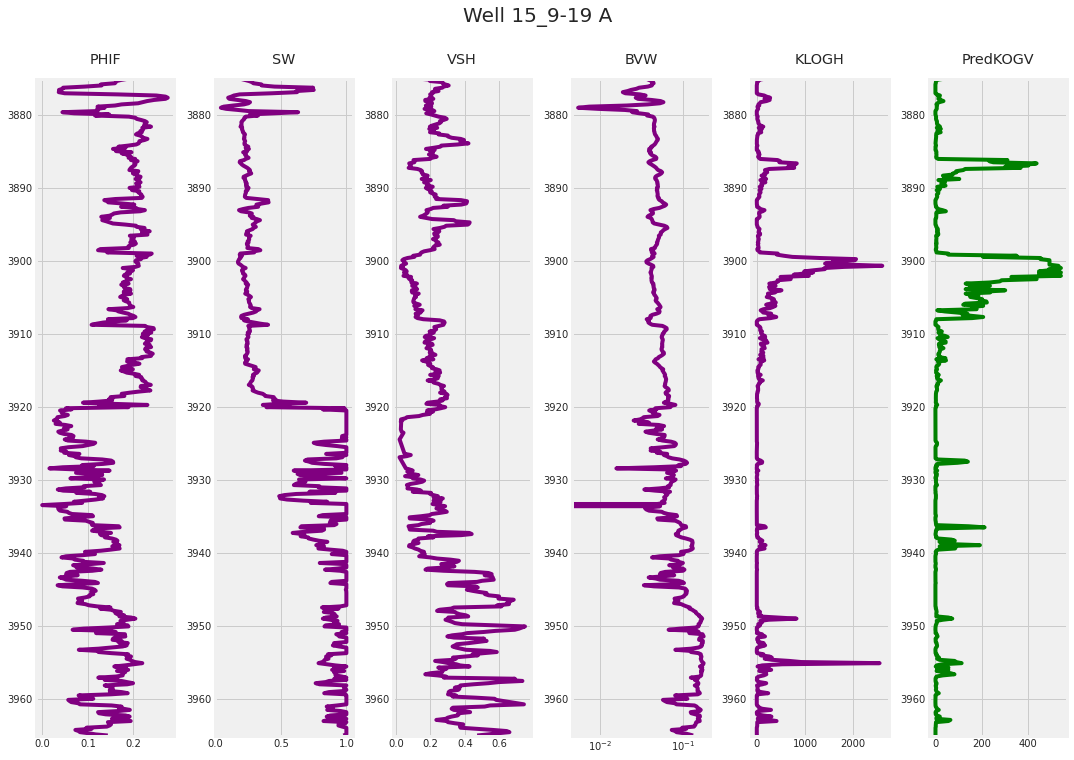

In [221]:
# Display the test data
well = well1 # test wells: well2, well5

# define what logs are we going to us
logs = ['PHIF','SW','VSH','BVW', 'KLOGH', 'KLOGV']

# titles to show
title = ['PHIF','SW','VSH','BVW', 'KLOGH', 'PredKOGV']
# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(15,10))
fig.suptitle('Well 15_9-19 A', size=20, y=1.05)

# looping each log to display in the subplots

colors = ['purple', 'purple', 'purple', 'purple', 'purple', 'green']

for i in range(len(logs)):
  if i == 3:
    # for resistivity, semilog plot
    ax[i].semilogx(well[logs[i]], well['DEPTH'], color=colors[i])
  else:
    # for non-resistivity, normal plot
    ax[i].plot(well[logs[i]], well['DEPTH'], color=colors[i])
  
  ax[i].set_ylim(max(well['DEPTH']), min(well['DEPTH']))
  ax[i].set_title(title[i], pad=15)
  ax[i].grid(True)

#ax[2].set_xlim(0, 200)
plt.tight_layout(1)
plt.show()

In [222]:
well1.to_csv('/content/o-g_data_analsis/welldt.csv', index=False)


In [223]:
well1

DEPTH  PHIF   SW  VSH  BVW  KLOGH  KLOGV
1368 3875.07  0.19 0.19 0.14 0.04 159.00  35.88
1369 3875.23  0.17 0.23 0.21 0.04  30.07   3.82
1370 3875.38  0.16 0.26 0.20 0.04  33.46   3.44
1371 3875.53  0.16 0.28 0.27 0.04   7.28   1.93
1372 3875.68  0.16 0.29 0.27 0.04   6.74   1.50
...      ...   ...  ...  ...  ...    ...    ...
1954 3964.38  0.08 1.00 0.64 0.08   0.02   0.04
1955 3964.53  0.08 1.00 0.66 0.08   0.02   0.06
1956 3964.69  0.10 1.00 0.59 0.10   0.12   0.14
1957 3964.84  0.12 1.00 0.53 0.12   0.46   0.26
1958 3964.99  0.14 0.98 0.47 0.13   4.52   0.42

[591 rows x 7 columns]

In [224]:
models = ['random_forest','svm','decision_tree','logistic_regression','knn']
model_train_acc=[]
model_test_acc=[]

In [225]:
%matplotlib inline

In [226]:
fig.tight_layout()
plt.savefig('output.png', dpi=300)

<Figure size 432x288 with 0 Axes>

# Result Validation

In [227]:
#importing core data of well1 data(15_9-19A-CORE.csv)
#check my another notebook